In [21]:
from fastai.vision.all import *
import matplotlib.pyplot as plt

In [4]:
path = Path.cwd()/"../datasets/Strawberry"

In [10]:
print("Total leaf scorch", len((path/'Leaf scorch').ls()))
print("Total healthy", len((path/'Healthy').ls()))

Total leaf scorch 1109
Total healthy 456


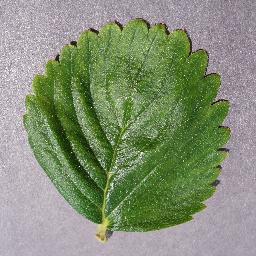

In [19]:
PILImage.create((path/'Healthy').ls()[1])

In [37]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(400),
    batch_tfms=aug_transforms(),
    splitter=RandomSplitter(.3, seed=42)
)

In [38]:
data = dls.dataloaders(path)

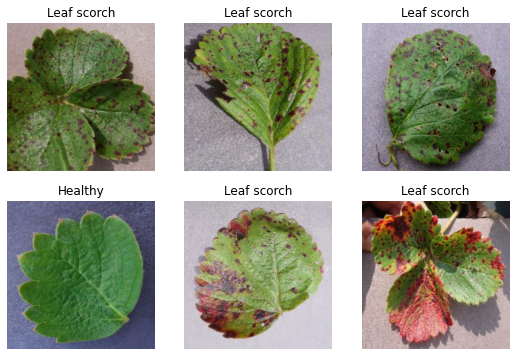

In [39]:
data.train.show_batch(max_n=6)

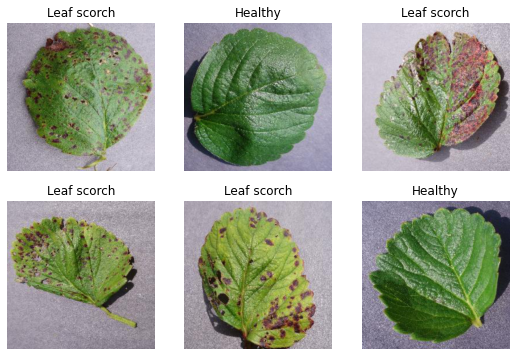

In [40]:
data.valid.show_batch(max_n=6)

In [44]:
model = cnn_learner(data, resnet18, metrics=[accuracy, error_rate])

In [45]:
model.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.492616,0.059555,0.976546,0.023454,00:17


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.014663,0.012118,0.993603,0.006397,00:21
1,0.006410,0.000211,1.000000,0.000000,00:21


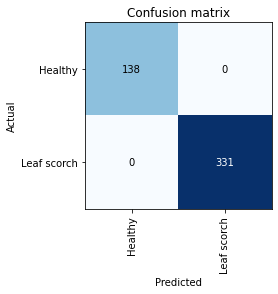

In [46]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

In [48]:
model.export(Path.cwd()/"../models/Strawberry.pkl")

In [50]:
from fastai.vision.widgets import FileUpload

btn = FileUpload()
btn

FileUpload(value={}, description='Upload')

In [51]:
model.predict(btn.data[0])

('Healthy', tensor(0), tensor([1.0000e+00, 1.1012e-07]))